# Jugando con series de tiempo

En este Jupyter la idea es revisar algunas cosas básicas sobre series de tiempo

Vamos a usar los datos del clima de Delhi que estan en kaggle (https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importamos los datasets
ruta = ("datasets/Delhi clime/"
        "datasets_312121_636393_DailyDelhiClimateTrain.csv")
df_train = pd.read_csv(ruta)

Exploramos el dataset

In [3]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
date            1462 non-null object
meantemp        1462 non-null float64
humidity        1462 non-null float64
wind_speed      1462 non-null float64
meanpressure    1462 non-null float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Transformamos la fecha a datetime

In [5]:
df_train["date"] = pd.to_datetime(df_train["date"])
print(f"La fecha maxima en el dataset es {df_train['date'].max()}")
print(f"La fecha minima en el dataset es {df_train['date'].min()}")

La fecha maxima en el dataset es 2017-01-01 00:00:00
La fecha minima en el dataset es 2013-01-01 00:00:00


In [6]:
dias = (df_train['date'].max() -
        df_train['date'].min()).total_seconds()/(3600*24)
print(dias)

1461.0


### 1- Graficando las series

Antes de hacer cualquier otra cosa necesitamos saber como son los datos y la mejor forma de saberlo es usando graficos

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

<Figure size 1500x500 with 2 Axes>

Se ve muycho ruido en los datos, ahora es donde seria util suavizar la curva

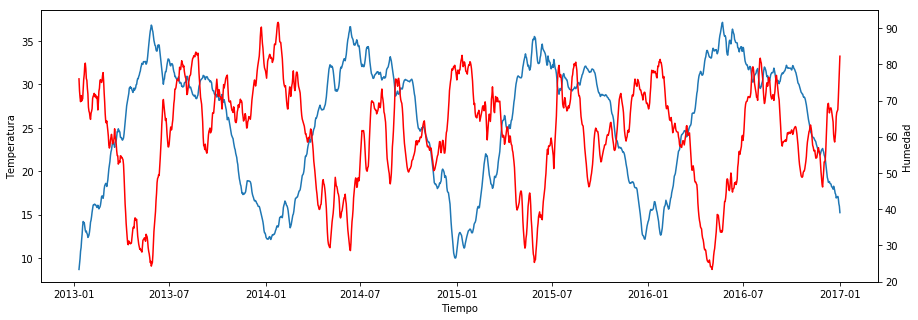

In [8]:
ventana = 10
df_train['meantemp_smooth'] = df_train['meantemp'].rolling(window=ventana).mean()
df_train['humidity_smooth'] = df_train['humidity'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_train['date'], df_train['meantemp_smooth'])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Temperatura')
ax2 = ax.twinx()
ax2.plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax2.set_ylabel('Humedad')
plt.show()

Si lo que queremos es ver como se mueven todos los valores al mismo tiempo

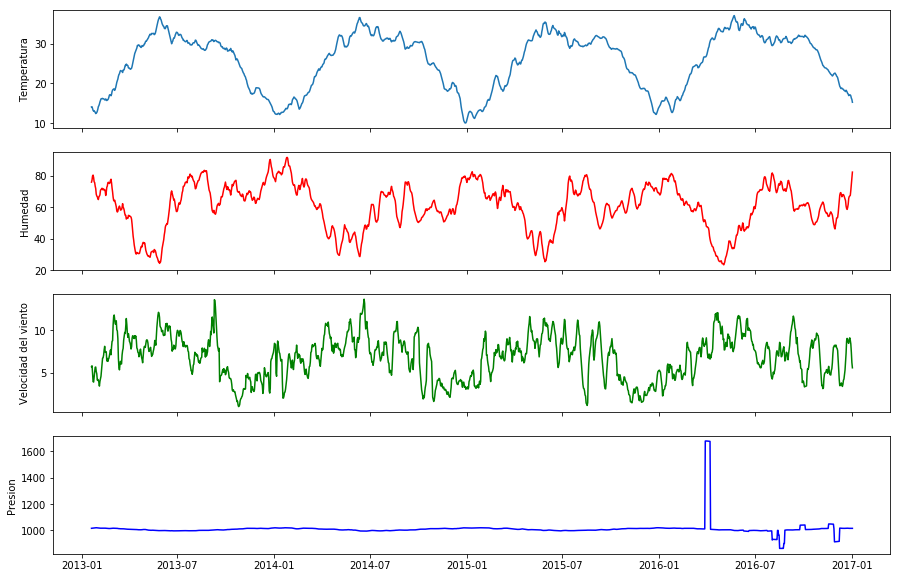

In [9]:
ventana = 10
df_train['wind_speed_smooth'] = df_train['wind_speed'].rolling(window=ventana).mean()
df_train['meanpressure_smooth'] = df_train['meanpressure'].rolling(window=ventana).mean()

# Eliminamos nans
df_train.dropna(inplace=True)

fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
ax[0].plot(df_train['date'], df_train['meantemp_smooth'])
ax[1].plot(df_train['date'], df_train['humidity_smooth'], c="r")
ax[2].plot(df_train['date'], df_train['wind_speed_smooth'], c="g")
ax[3].plot(df_train['date'], df_train['meanpressure_smooth'], c="b")
ax[0].set_ylabel('Temperatura')
ax[1].set_ylabel('Humedad')
ax[2].set_ylabel('Velocidad del viento')
ax[3].set_ylabel('Presion')
plt.show()

Los datos de presion atmosferica muestran una fuerte alza en un periodo en particular. Obtengamos boxplots para los valores.

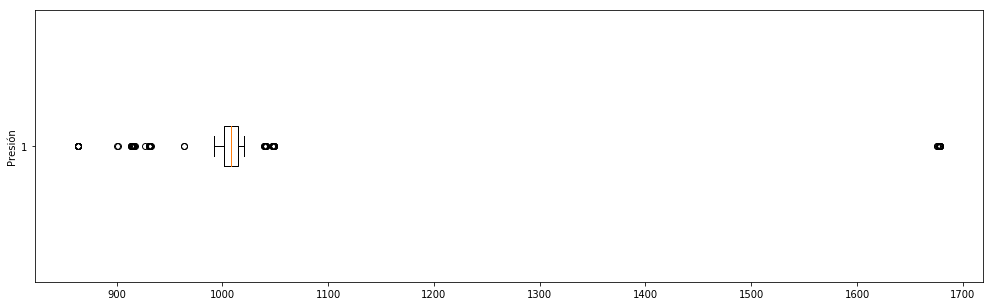

In [10]:
fig, ax = plt.subplots(figsize=(17,5))
ax.boxplot(df_train['meanpressure_smooth'], vert=False)
ax.set_ylabel("Presión")
plt.show()

### 2- ¿Que pasa si hay datos faltantes?

En estos datos no parece haber ningun dato faltante, de todas formas, con el fin de entender que hacer en estos casos, eliminaremos parte de la data para poder tratar de rellenar estos valores

In [11]:
# Generamos numeros aleatorios
import random
numeros = [random.randint(0,len(df_train)-1) for i in range(800)]
print(numeros)

[918, 884, 1063, 741, 215, 1052, 425, 406, 1054, 765, 1258, 684, 951, 1338, 255, 831, 1063, 1104, 432, 1188, 804, 772, 968, 13, 271, 511, 1305, 350, 186, 260, 769, 808, 467, 520, 1408, 1062, 1388, 1376, 698, 273, 619, 784, 110, 219, 1327, 4, 542, 383, 177, 645, 1240, 598, 766, 189, 887, 759, 386, 790, 1111, 378, 790, 404, 686, 276, 1439, 1010, 301, 946, 527, 535, 1250, 130, 238, 635, 925, 1325, 1045, 591, 1398, 490, 1017, 1192, 353, 966, 464, 939, 1104, 973, 260, 836, 918, 743, 1251, 1045, 1381, 1264, 1229, 1152, 394, 684, 887, 800, 498, 165, 162, 266, 1063, 164, 573, 675, 822, 4, 520, 783, 227, 30, 193, 1425, 1189, 1414, 1223, 629, 424, 1064, 1009, 373, 316, 176, 962, 318, 1017, 91, 1381, 215, 1038, 316, 535, 1309, 121, 1018, 139, 921, 709, 48, 63, 412, 243, 1246, 1101, 1330, 30, 167, 1369, 1076, 261, 771, 1316, 1251, 1017, 947, 332, 375, 637, 692, 968, 281, 642, 451, 856, 1036, 128, 683, 781, 1410, 1196, 580, 1319, 260, 408, 708, 962, 1420, 1389, 790, 29, 991, 785, 755, 285, 79, 1029

In [12]:
# Eliminamos aquellos numeros de los datos
df_train_ = df_train.reset_index(drop=True).drop(numeros).reset_index(drop=True)

In [13]:
# Juntamos los datasets
df_train_join = df_train.merge(df_train_, on=["date"], how="left")
df_train_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1443
Data columns (total 17 columns):
date                     1444 non-null datetime64[ns]
meantemp_x               1444 non-null float64
humidity_x               1444 non-null float64
wind_speed_x             1444 non-null float64
meanpressure_x           1444 non-null float64
meantemp_smooth_x        1444 non-null float64
humidity_smooth_x        1444 non-null float64
wind_speed_smooth_x      1444 non-null float64
meanpressure_smooth_x    1444 non-null float64
meantemp_y               830 non-null float64
humidity_y               830 non-null float64
wind_speed_y             830 non-null float64
meanpressure_y           830 non-null float64
meantemp_smooth_y        830 non-null float64
humidity_smooth_y        830 non-null float64
wind_speed_smooth_y      830 non-null float64
meanpressure_smooth_y    830 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 203.1 KB


Ahora tenemos el mismo dataset anterior pero con menos informacion en algunas columnas.

Vamos a tratar de rellenar los valores faltantes para la temperatura y humedad

In [14]:
df_train_join["meantemp_y"] = df_train_join["meantemp_y"].interpolate('linear')

df_train_join["humidity_y"] = df_train_join["humidity_y"].interpolate('linear')

Comparemos ahora el original con el dataset que fue rellenado

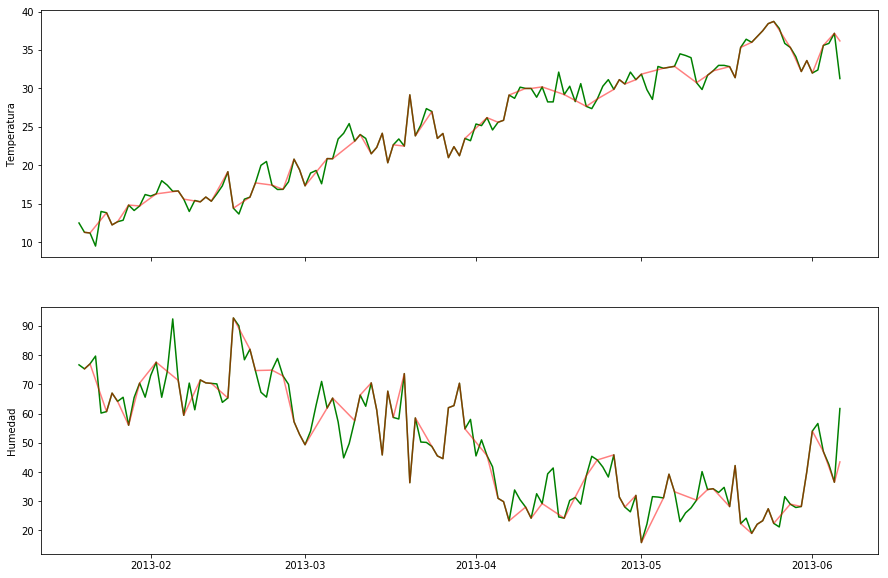

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
ax[0].plot(df_train_join['date'][0:139], df_train_join['meantemp_x'][0:139], c="g")
ax[0].plot(df_train_join['date'][0:139], df_train_join['meantemp_y'][0:139], c="r", alpha=0.5)
ax[1].plot(df_train_join['date'][0:139], df_train_join['humidity_x'][0:139], c="g")
ax[1].plot(df_train_join['date'][0:139], df_train_join['humidity_y'][0:139], c="r", alpha=0.5)
ax[0].set_ylabel('Temperatura')
ax[1].set_ylabel('Humedad')
plt.show()

La serie verde muestra como son los datos los originales, mientras q la roja, como es la serie cuyos datos fueron interpolados

### 3- ¿Que hacemos con los outliers?

Un outlier es un dato atipico, es decir, uno que comparado con el resto de los datos es muy distinto. 

Supongamos que consideraremos atipico cualquier dato que este mas allá de dos desviaciones estandar de la media

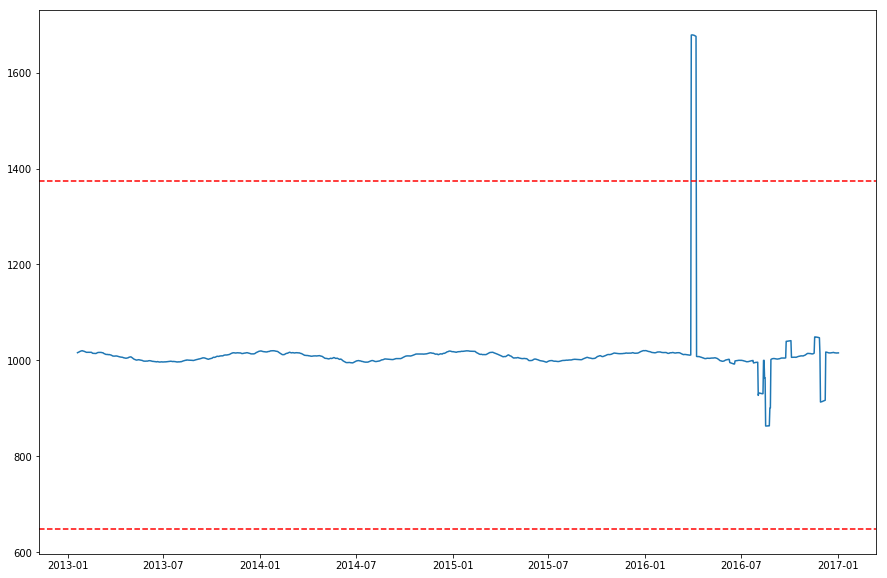

In [16]:
promedio = df_train['meanpressure'].mean()
std = df_train['meanpressure'].std()

fig, ax = plt.subplots(figsize=(15, 10), sharex=True)

ax.plot(df_train['date'], df_train['meanpressure_smooth'])
ax.axhline(promedio + std * 2, ls='--', c='r')
ax.axhline(promedio - std * 2, ls='--', c='r')

Si se fijan hay datos al final de la serie que son extraños, pero no entran en nuestra categoria, pero que hay del cambio que estos tienen a traves del tiempo

Calculamos el porcentaje de un punto con respecto a la media de los puntos anteriores

In [17]:
def variacion_promedio(values):

    valores_anteriores = values.iloc[:-1]
    ultimo_valor = values.iloc[-1]

    v_promedio = ((ultimo_valor - np.mean(valores_anteriores))
                  / np.mean(valores_anteriores))
    return v_promedio

In [18]:
df_train.reset_index(inplace=True, drop=True)
df_train['meanpressure_percent_change'] =\
    df_train['meanpressure'].rolling(window=10).aggregate(variacion_promedio)

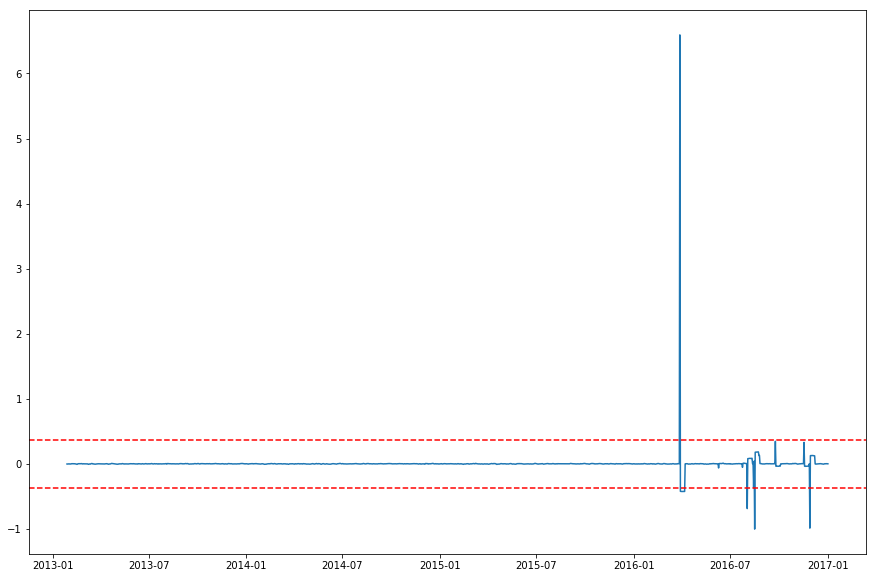

In [19]:
promedio = df_train['meanpressure_percent_change'].mean()
std = df_train['meanpressure_percent_change'].std()

fig, ax = plt.subplots(figsize=(15, 10), sharex=True)

ax.plot(df_train['date'], df_train['meanpressure_percent_change'])
ax.axhline(promedio + std * 2, ls='--', c='r')
ax.axhline(promedio - std * 2, ls='--', c='r')

Ahora más puntos aparecen como outliers.

Una de las aproximaciones mas comunes es reemplazar los outliers con la media.

In [20]:
# Numero de veces en donde la variacion porcentual es mas de dos desviaciones estandar
print(sum(abs(df_train['meanpressure_percent_change']) > std * 2))

# Lista de indices en donde la variacion porcentual es mas de dos desviaciones estandar
outliers = np.abs(df_train['meanpressure_percent_change']) > (std * 2)

13


In [21]:
# Esto es para evitar que aparezcan advertencias en la consola
import warnings
warnings.filterwarnings("ignore")

df_train['meanpressure_percent_change_fixed'] = df_train['meanpressure_percent_change'].copy()
df_train['meanpressure_percent_change_fixed'][outliers] = np.nanmedian(df_train['meanpressure_percent_change_fixed'])

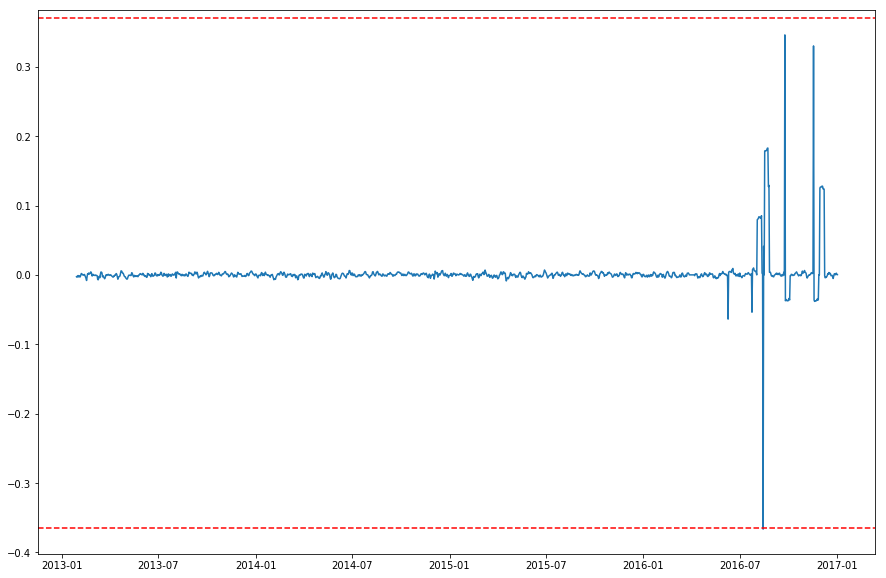

In [22]:
promedio = df_train['meanpressure_percent_change'].mean()
std = df_train['meanpressure_percent_change'].std()

fig, ax = plt.subplots(figsize=(15, 10), sharex=True)

ax.plot(df_train['date'], df_train['meanpressure_percent_change_fixed'])
ax.axhline(promedio + std * 2, ls='--', c='r')
ax.axhline(promedio - std * 2, ls='--', c='r')

### 4- Calculando caracteristicas de las series a traves del tiempo

Para poder predecir o para tener un buen entendimiento de como evoluciona la serie de tiempo a través del tiempo puede ser util calcular algunas estadisticas tipicas.

A modo de ejemplo tomemos los datos de temperatura y calculemos la media, mediana, desviacion estandar y los distintos quantiles de esta, en una ventana de 10 días

In [23]:
ventana = 10

stats = df_train['meantemp'].rolling(window=ventana).aggregate([np.mean, np.median, np.std]).dropna()

In [24]:
print(stats.head())

         mean     median       std
9   12.492619  12.583333  1.558275
10  12.655119  12.761905  1.641630
11  12.997976  13.345238  1.681399
12  13.497976  13.916667  1.824651
13  14.147976  14.062500  1.333978


Para calcular los percentiles de una serie usamos la funcion partial

In [25]:
from functools import partial

percentile_funcs = [partial(np.percentile, q=ii) for ii in [25, 50, 75]]

funciones = [np.mean, np.median, np.std]
funciones.extend(percentile_funcs)

stats = df_train['meantemp'].rolling(window=ventana).aggregate(funciones).dropna()

In [26]:
stats.head()

,mean,median,std,percentile,percentile,percentile
9,12.492619,12.583333,1.558275,11.526786,12.583333,13.589286
10,12.655119,12.761905,1.641630,11.526786,12.761905,13.958333
11,12.997976,13.345238,1.681399,12.354167,13.345238,14.093750
12,13.497976,13.916667,1.824651,12.714286,13.916667,14.566964
13,14.147976,14.062500,1.333978,13.101190,14.062500,14.803571


In [27]:
stats.columns = ["mean", "median", "std", "p25", "p50", "p75"]

[]

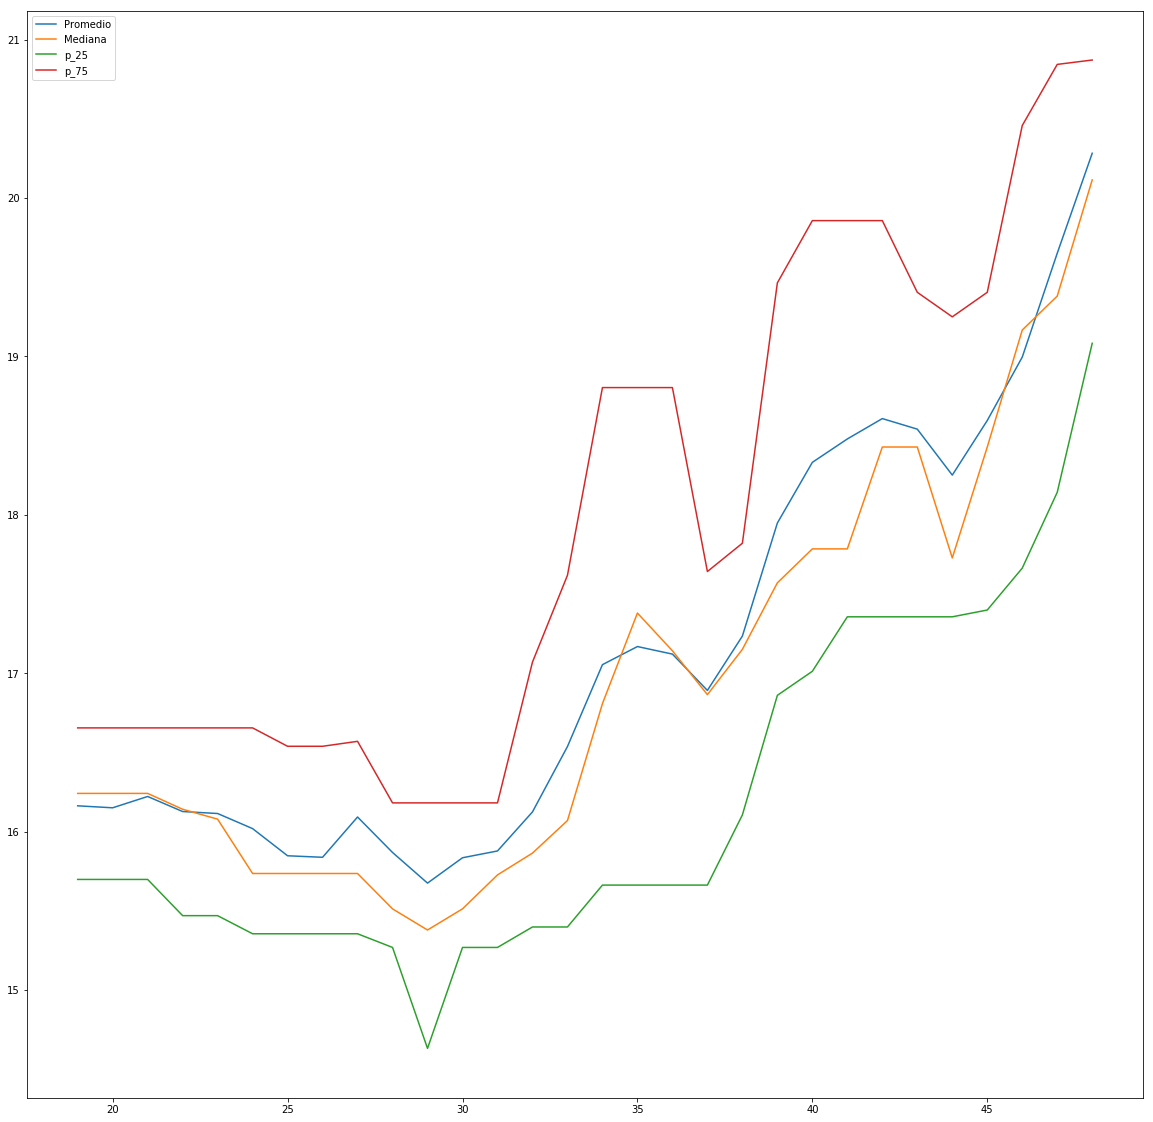

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(stats["mean"][10:40], label="Promedio")
ax.plot(stats["median"][10:40], label="Mediana")
ax.plot(stats["p25"][10:40], label="p_25")
ax.plot(stats["p75"][10:40], label="p_75")
ax.legend()
plt.plot()

### 5- Autocorrelación

Lo que queremos conocer es que tan relacionado estan los registros con sus vecinos mas cercanos, es decir, con los registros del día anterior

Usando la serie de tiempo de la temperatura construiremos un siple modelo de regresion y veremos que coeficientes cobran machor prepondeancia

In [48]:
previous = [1, 2, 3, 4, 5, 6]
previous_values = {'previous_{}'.format(ii):
                   df_train['meantemp'].shift(ii)
                   for ii in previous}
previous_values_temp =\
    pd.DataFrame(previous_values).dropna().reset_index(drop=True)

print(previous_values_temp.head())

   previous_1  previous_2  previous_3  previous_4  previous_5  previous_6
0   13.833333   14.000000    9.500000   11.200000   11.285714   12.500000
1   12.250000   13.833333   14.000000    9.500000   11.200000   11.285714
2   12.666667   12.250000   13.833333   14.000000    9.500000   11.200000
3   12.857143   12.666667   12.250000   13.833333   14.000000    9.500000
4   14.833333   12.857143   12.666667   12.250000   13.833333   14.000000


In [49]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(previous_values_temp, df_train['meantemp'][6:])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

[None, None, None, None, None, None, None, None, None, None, None, None]

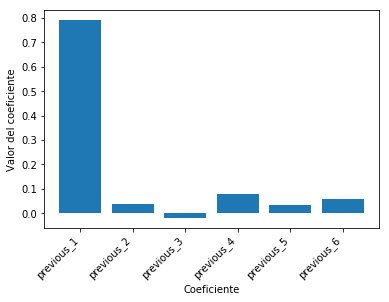

In [50]:
fig, ax = plt.subplots()

ax.bar(previous_values_temp.columns, model.coef_)
ax.set(xlabel='Coeficiente', ylabel='Valor del coeficiente')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Notamos que el valor anterior es el que mas importancia tiene, si suavizamos la data podemos encontrar mayor informacion de los parametros anteriores

[None, None, None, None, None, None, None, None, None, None, None, None]

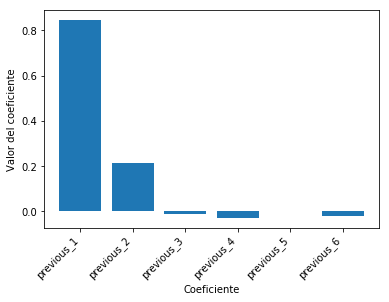

In [89]:
# Definimos la ventana de datos
ventana = 50
df_train['meantemp_smooth'] = \
    df_train['meantemp'].rolling(window=ventana).mean().\
    dropna().reset_index(drop=True)

# Obtenemos los valores anteriores
previous = [1, 2, 3, 4, 5, 6]
previous_values = {'previous_{}'.format(ii):
                   df_train['meantemp_smooth'].shift(ii)
                   for ii in previous}
previous_values_temp =\
    pd.DataFrame(previous_values).dropna().reset_index(drop=True)
df_train['meantemp_smooth'].dropna(inplace=True)

# Ajustamos el modelo de regresión
model = Ridge()
model.fit(previous_values_temp, df_train['meantemp_smooth'][5:])

# Graficamos
fig, ax = plt.subplots()

ax.bar(previous_values_temp.columns, model.coef_)
ax.set(xlabel='Coeficiente', ylabel='Valor del coeficiente')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')